In [1]:
import pickle
import matplotlib.pyplot as plt

with open('bengio_test_results.pkl', 'rb') as f:
    results = pickle.load(f)

with open('bengio_test_results_20_percent.pkl', 'rb') as f:
    r20 = pickle.load(f)

with open('bengio_train_results.pkl', 'rb') as f:
    results_train = pickle.load(f)

In [2]:
preds = results['preds']
true = results['true']
masked = results['masked']

preds20 = r20['preds']
true20 = r20['true']
masked20 = r20['masked']

preds_train = results_train['preds']
true_train = results_train['true']
masked_train = results_train['masked']

In [3]:
def count_char_occurrences(string, char):
    count = 0
    for c in string:
        if c == char:
            count += 1
    return count

def analyze_results(preds, true, m, masked_char = '¿'):

    total_correct = 0

    correct_by_num_missing = dict()
    correct_by_char_count = dict()
    total_by_char_count = dict()
    total_by_num_missing = dict()

    for i in range(len(preds)):
        pred = preds[i]
        label = true[i]
        masked = m[i]

        num_masked_chars = count_char_occurrences(masked, masked_char)

        if pred == label:
            total_correct += 1
            
            if num_masked_chars in correct_by_num_missing:
                correct_by_num_missing[num_masked_chars] += 1
            else:
                correct_by_num_missing[num_masked_chars] = 1
            
            if len(label) in correct_by_char_count:
                correct_by_char_count[len(label)] += 1
            else:
                correct_by_char_count[len(label)] = 1
        
        if num_masked_chars in total_by_num_missing:
            total_by_num_missing[num_masked_chars] += 1
        else:
            total_by_num_missing[num_masked_chars] = 1

        if len(label) in total_by_char_count:
            total_by_char_count[len(label)] += 1
        else:
            total_by_char_count[len(label)] = 1
    

    print(f'Total acc: {total_correct / len(preds)}')

    for key in correct_by_num_missing:
        print(f'Acc for words with {key} chars missing: {correct_by_num_missing[key] / total_by_num_missing[key]}')

    for key in correct_by_char_count:
        print(f'Acc for words with {key} chars in total: {correct_by_char_count[key] / total_by_char_count[key]}')
    
    print(f'# words with x chars missing: {total_by_num_missing}')


    return correct_by_num_missing, correct_by_char_count, total_by_char_count, total_by_num_missing



In [4]:
correct_by_num_missing, correct_by_char_count, total_by_char_count, total_by_num_missing = analyze_results(preds,true,masked)


Total acc: 0.9536892191370095
Acc for words with 1 chars missing: 0.9561299587147729
Acc for words with 2 chars missing: 0.9288625416821045
Acc for words with 3 chars missing: 0.944
Acc for words with 4 chars missing: 1.0
Acc for words with 5 chars in total: 0.9715545441615702
Acc for words with 10 chars in total: 0.9970126960418223
Acc for words with 6 chars in total: 0.971875
Acc for words with 7 chars in total: 0.9809523809523809
Acc for words with 9 chars in total: 0.9968553459119497
Acc for words with 4 chars in total: 0.8945961995249406
Acc for words with 3 chars in total: 0.9445456912262432
Acc for words with 11 chars in total: 0.9960988296488946
Acc for words with 2 chars in total: 0.8015267175572519
Acc for words with 8 chars in total: 0.9926873857404022
Acc for words with 12 chars in total: 0.9954022988505747
Acc for words with 13 chars in total: 0.9943502824858758
Acc for words with 1 chars in total: 0.7878787878787878
Acc for words with 14 chars in total: 1.0
Acc for words 

In [5]:
correct_by_char_count

{5: 6831,
 10: 1335,
 6: 3421,
 7: 3090,
 9: 1902,
 4: 3013,
 3: 3628,
 11: 766,
 2: 1680,
 8: 2715,
 12: 433,
 13: 176,
 1: 156,
 14: 97,
 15: 17,
 17: 1,
 16: 2}

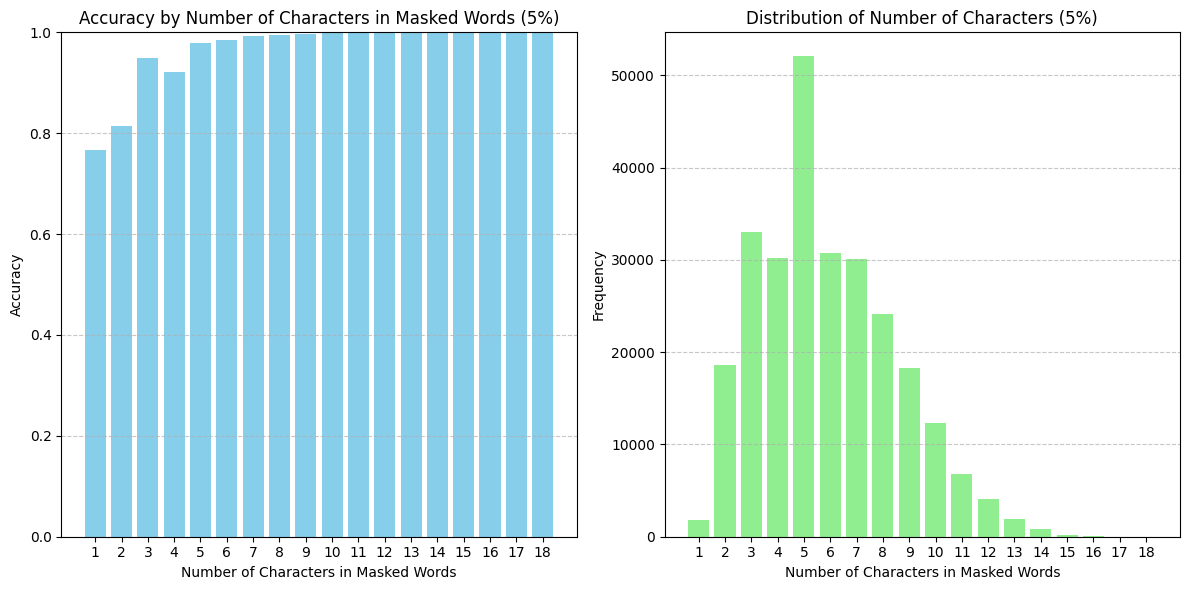

In [13]:
# Calculate accuracy for each number of characters
accuracies = {}
for char_count in correct_by_char_count:
    accuracy = correct_by_char_count[char_count] / total_by_char_count[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters in Masked Words')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters in Masked Words (5%)')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_char_count.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_char_count.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters in Masked Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters (5%)')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

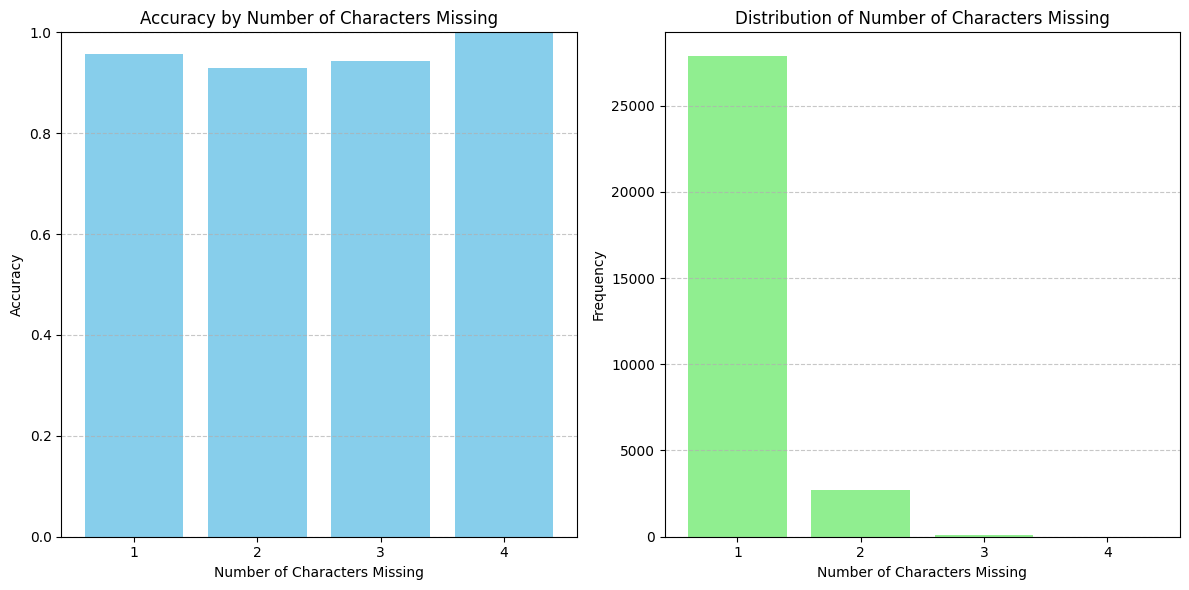

In [7]:
# Calculate accuracy for each number of characters missing
accuracies = {}
for char_count in correct_by_num_missing:
    accuracy = correct_by_num_missing[char_count] / total_by_num_missing[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters Missing')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_num_missing.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_num_missing.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters Missing')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [8]:
correct_by_num_missing, correct_by_char_count, total_by_char_count, total_by_num_missing = analyze_results(preds20,true20,masked20)

Total acc: 0.8852321748439272
Acc for words with 2 chars missing: 0.8570063815965455
Acc for words with 1 chars missing: 0.9074186656476351
Acc for words with 3 chars missing: 0.8387056781552195
Acc for words with 4 chars missing: 0.821659215101838
Acc for words with 5 chars missing: 0.8093126385809313
Acc for words with 6 chars missing: 0.8695652173913043
Acc for words with 7 chars missing: 0.8571428571428571
Acc for words with 8 chars missing: 1.0
Acc for words with 5 chars in total: 0.9269828510182208
Acc for words with 8 chars in total: 0.9646827071900943
Acc for words with 10 chars in total: 0.9868421052631579
Acc for words with 6 chars in total: 0.9076055242170784
Acc for words with 2 chars in total: 0.6369789811186319
Acc for words with 4 chars in total: 0.7940678720940589
Acc for words with 3 chars in total: 0.8850958126330731
Acc for words with 7 chars in total: 0.9497516460667668
Acc for words with 9 chars in total: 0.9765987492434941
Acc for words with 11 chars in total: 0.9

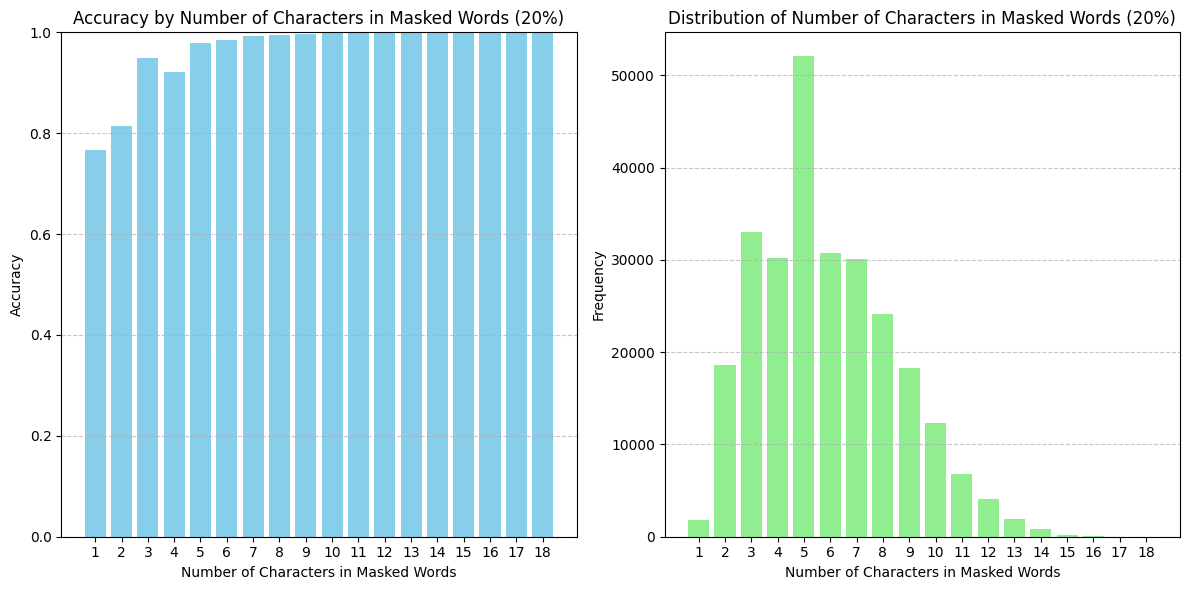

In [14]:
# Calculate accuracy for each number of characters
accuracies = {}
for char_count in correct_by_char_count:
    accuracy = correct_by_char_count[char_count] / total_by_char_count[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters in Masked Words')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters in Masked Words (20%)')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_char_count.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_char_count.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters in Masked Words')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters in Masked Words (20%)')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

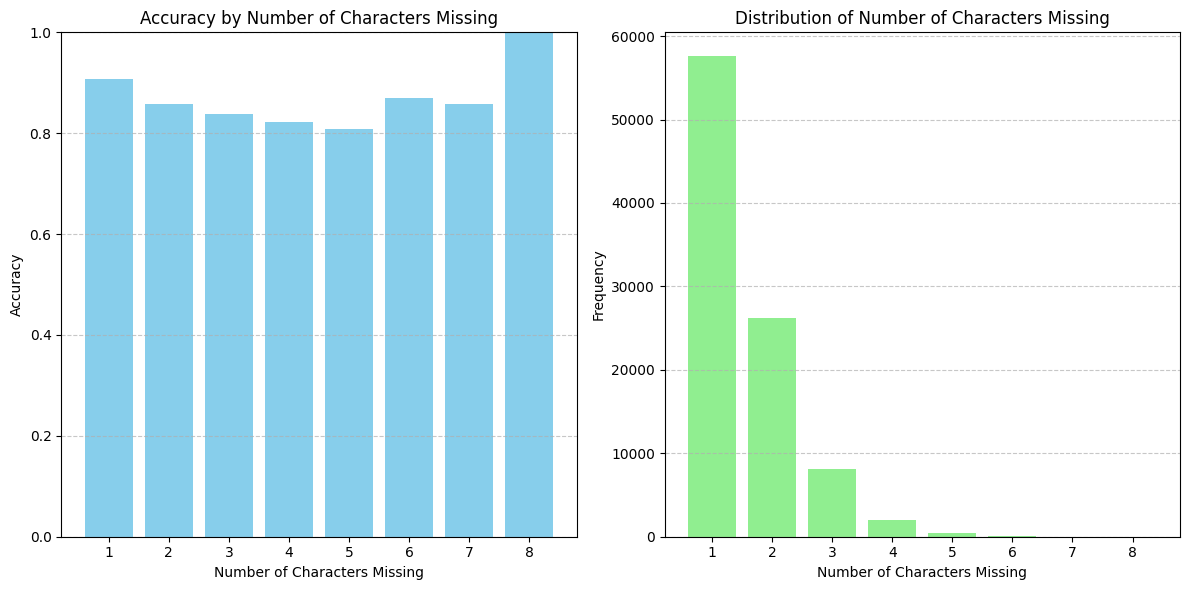

In [10]:
# Calculate accuracy for each number of characters missing
accuracies = {}
for char_count in correct_by_num_missing:
    accuracy = correct_by_num_missing[char_count] / total_by_num_missing[char_count]
    accuracies[char_count] = accuracy

# Plotting accuracy by number of characters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Accuracy')
plt.title('Accuracy by Number of Characters Missing')
plt.xticks(list(accuracies.keys()))
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plotting distribution of number of characters
plt.subplot(1, 2, 2)

# Extracting the character counts from the total_examples dictionary
character_counts = list(total_by_num_missing.keys())
# Extracting the corresponding frequencies
frequencies = list(total_by_num_missing.values())

plt.bar(character_counts, frequencies, color='lightgreen')
plt.xlabel('Number of Characters Missing')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Characters Missing')
plt.xticks(character_counts)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [11]:
correct_by_num_missing, correct_by_char_count, total_by_char_count, total_by_num_missing = analyze_results(preds_train,true_train,masked_train)


Total acc: 0.9623147872432652
Acc for words with 2 chars missing: 0.9442646683130376
Acc for words with 1 chars missing: 0.9642089240635306
Acc for words with 3 chars missing: 0.9375951293759512
Acc for words with 4 chars missing: 0.9803921568627451
Acc for words with 5 chars missing: 1.0
Acc for words with 8 chars in total: 0.9952685315846269
Acc for words with 10 chars in total: 0.9982154445165476
Acc for words with 7 chars in total: 0.9918861399308326
Acc for words with 9 chars in total: 0.9975922075079348
Acc for words with 3 chars in total: 0.9484635857730462
Acc for words with 12 chars in total: 0.9985415653864852
Acc for words with 5 chars in total: 0.978239575931012
Acc for words with 6 chars in total: 0.9844304745773753
Acc for words with 2 chars in total: 0.8145325748631533
Acc for words with 4 chars in total: 0.9216327879689308
Acc for words with 11 chars in total: 0.9994146912496342
Acc for words with 1 chars in total: 0.7659456461453134
Acc for words with 13 chars in total